In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])
test = pd.read_csv('test.csv', parse_dates=['datetime'])
sub = pd.read_csv('sampleSubmission.csv')

## EDA

In [0]:
print(train.shape, test.shape)

(10886, 12) (6493, 9)


In [0]:
print(train.columns)
print(test.columns)
print(sub.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')
Index(['datetime', 'count'], dtype='object')


In [0]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [1]:
train['holiday'].value_counts()

NameError: ignored

In [0]:
new_tr = train.copy()
new_test = test.copy()

In [0]:
new_tr['year'] = new_tr.datetime.dt.year
new_tr['month'] = new_tr.datetime.dt.month
new_tr['day'] = new_tr.datetime.dt.day
new_tr['hour'] = new_tr.datetime.dt.hour
new_tr['minute'] = new_tr.datetime.dt.minute
new_tr['second'] = new_tr.datetime.dt.second
new_tr['dayofweek'] = new_tr.datetime.dt.dayofweek

new_tr[['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek']]

,datetime,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,2011,1,1,4,0,0,5
5,2011-01-01 05:00:00,2011,1,1,5,0,0,5
6,2011-01-01 06:00:00,2011,1,1,6,0,0,5
7,2011-01-01 07:00:00,2011,1,1,7,0,0,5
8,2011-01-01 08:00:00,2011,1,1,8,0,0,5
9,2011-01-01 09:00:00,2011,1,1,9,0,0,5


In [0]:
new_test['year'] = new_test.datetime.dt.year
new_test['month'] = new_test.datetime.dt.month
new_test['day'] = new_test.datetime.dt.day
new_test['hour'] = new_test.datetime.dt.hour
new_test['minute'] = new_test.datetime.dt.minute
new_test['second'] = new_test.datetime.dt.second
new_test['dayofweek'] = new_test.datetime.dt.dayofweek

new_test[['datetime', 'year', 'month', 'day', 'hour', 'minute', 'second']]

,datetime,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011,1,20,4,0,0
5,2011-01-20 05:00:00,2011,1,20,5,0,0
6,2011-01-20 06:00:00,2011,1,20,6,0,0
7,2011-01-20 07:00:00,2011,1,20,7,0,0
8,2011-01-20 08:00:00,2011,1,20,8,0,0
9,2011-01-20 09:00:00,2011,1,20,9,0,0


In [0]:
new_tr.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


10886

### 시각화

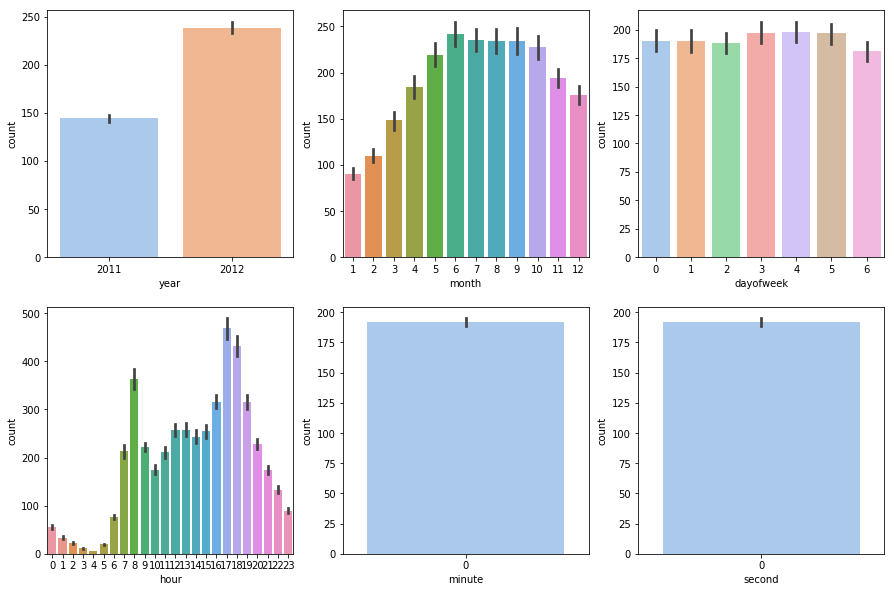

In [0]:
datetime_names = ['year', 'month', 'dayofweek', 
                  'hour', 'minute', 'second']

i = 0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(2,3, i)
    sns.barplot(x=name, y='count', data=new_tr)

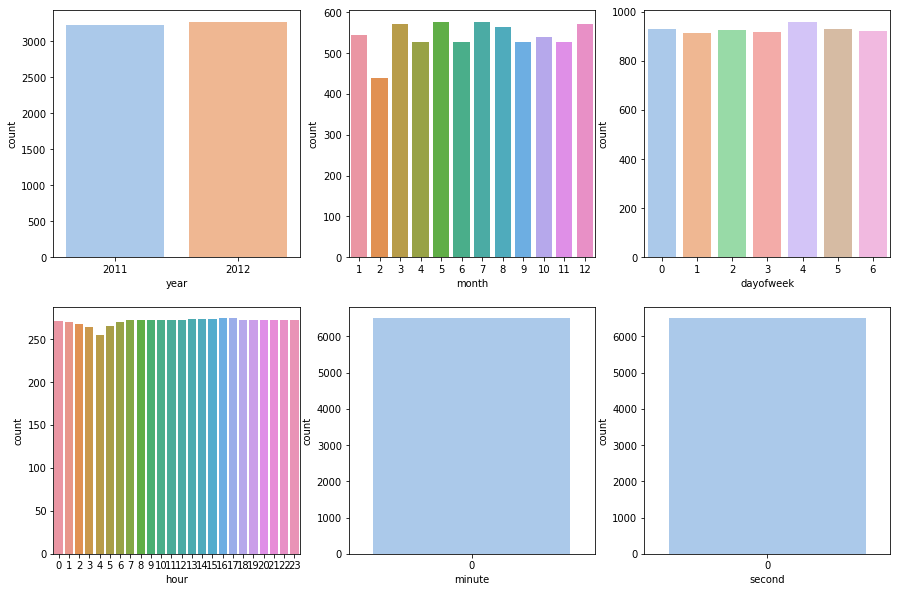

In [0]:
datetime_names = ['year', 'month', 'dayofweek', 
                  'hour', 'minute', 'second']

i = 0
plt.figure(figsize=(15,10))
for name in datetime_names:
    i = i + 1
    plt.subplot(2,3, i)
    sns.countplot(x=name, data=new_test)

In [0]:
new_tr = new_tr.drop(['minute', 'second'], axis=1)
new_test = new_test.drop(['minute', 'second'], axis=1)

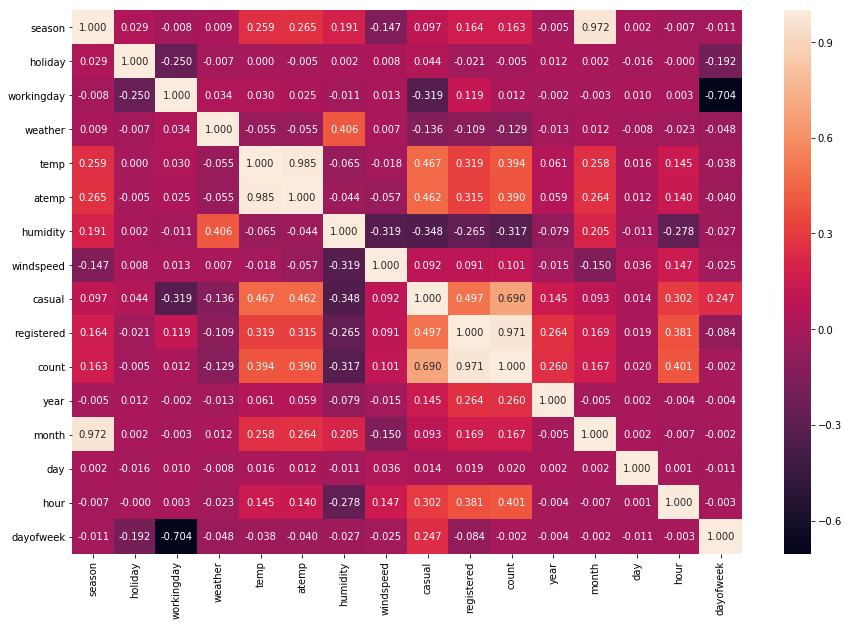

In [0]:
plt.figure(figsize=(15,10))
sns.heatmap(new_tr.corr(), annot=True, fmt='.3f')

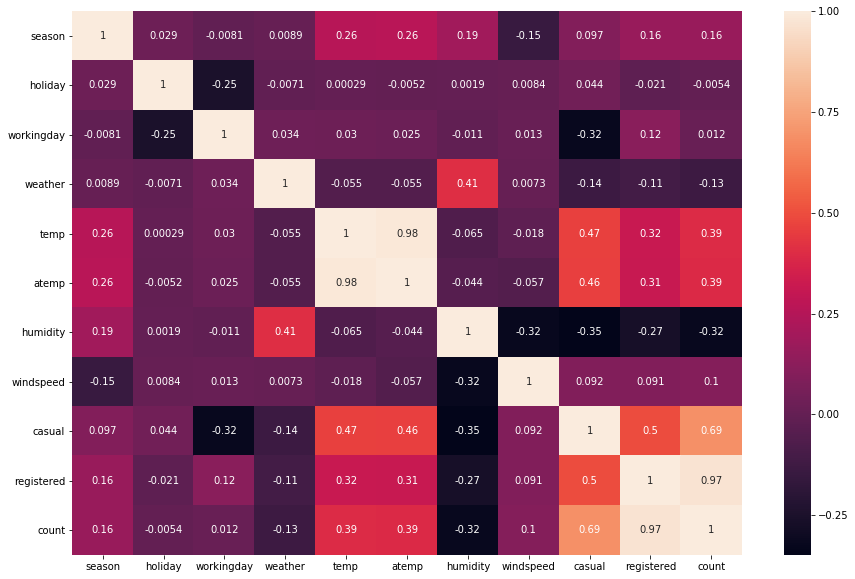

In [0]:
plt.subplots(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)

(array([4284., 2337., 1686., 1067.,  633.,  426.,  233.,  116.,   85.,
          19.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

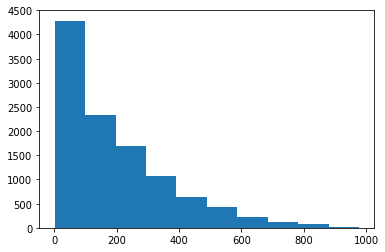

In [0]:
plt.hist(train['count'])

In [0]:
# 범주형 컬럼 : season, holiday, workingday, weather
# 수치형 컬럼 : temp, atemp, humidity, windspeed

In [0]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

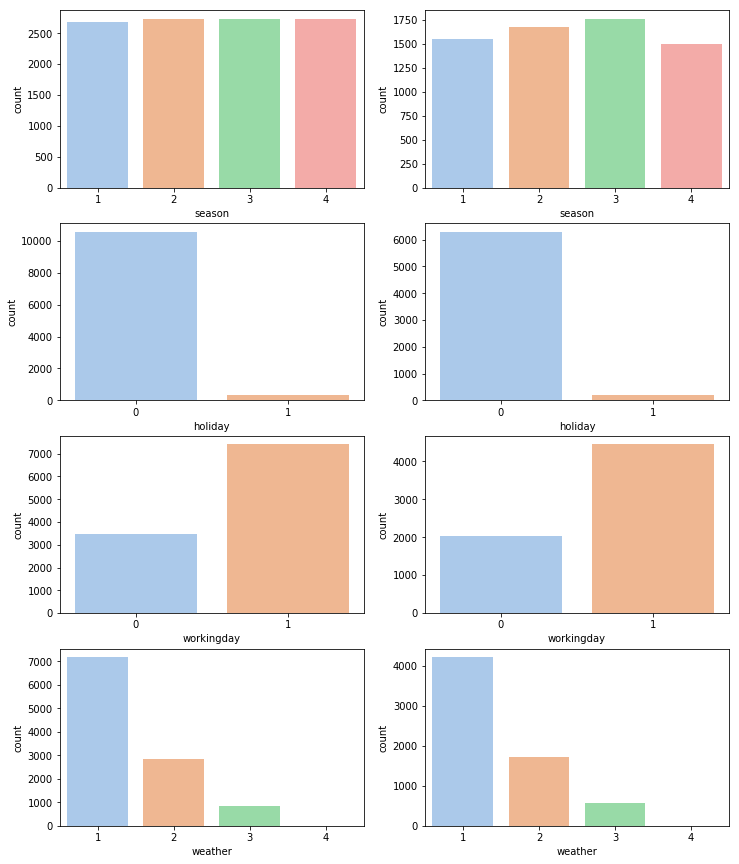

In [0]:
col_names = ['season', 'holiday', 'workingday', 'weather'] 
i = 0
plt.figure(figsize=(12,15))
sns.set_palette('pastel')

for name in col_names:
  i = i + 1
  plt.subplot(4,2,i)
  sns.countplot(name, data=train)

  i = i + 1
  plt.subplot(4,2,i)
  sns.countplot(name, data=test)

plt.show()

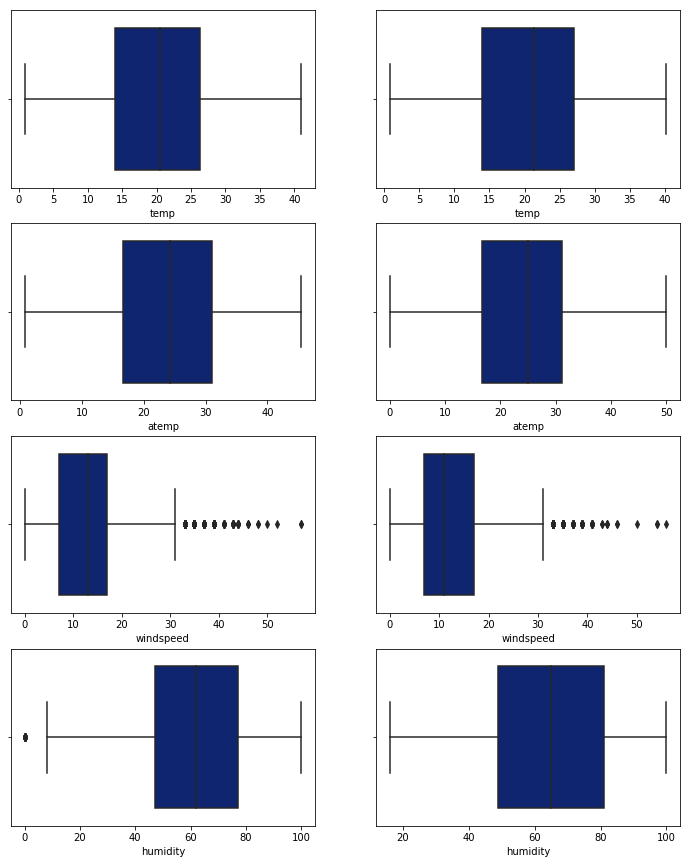

In [0]:
num_names = ['temp', 'atemp', 'windspeed', 'humidity']
i = 0
plt.figure(figsize=(12,15))

for name in num_names:
  i = i + 1
  plt.subplot(4,2,i)
  sns.boxplot(name, data=train)

  i = i + 1
  plt.subplot(4,2,i)
  sns.boxplot(name, data=test)

plt.show()

## 모델

### 00. 데이터 선택

In [0]:
sel = ['temp', 'atemp', 'humidity', 'year', 'hour']
X_train = new_tr[sel]
X_test = new_test[sel]

In [0]:
y_train = new_tr['count']

### 01. 선형 회귀 모델

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred

array([-10.84730115,   7.74664344,  15.59233588, ..., 235.62637272,
       254.56833171, 245.49085761])

In [0]:
sub['count'] = pred
sub.to_csv('firstsubmission.csv', index=False)

### 02. KNN 모델

In [0]:
from sklearn.neighbors import KNeighborsRegressor

In [0]:
model2 = KNeighborsRegressor()
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
pred2

array([ 28. ,  31.8,  36. , ..., 121.6,  98.6,  56.6])

In [0]:
sub['count'] = pred2
sub.to_csv('secondsubmission.csv', index=False)

### 03. 랜덤포레스트 모델

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
model3 = RandomForestRegressor(n_estimators=100, random_state=0)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
pred3

array([ 37.1275    ,  18.6925    ,  27.35      , ...,  86.77916667,
       106.63033333,  56.015     ])

In [0]:
sub['count'] = pred3
sub.to_csv('thirdsubmission.csv', index=False)

## cross validation

In [0]:
# !pip install mglearn

In [0]:
import os, warnings
warnings.filterwarnings(action='ignore')

In [0]:
import mglearn

In [0]:
from sklearn.model_selection import cross_val_score

### RMSLE

In [0]:
# RMSLE (Root Mean Sqare Logarithmic Error)
import numpy as np
from sklearn.metrics import make_scorer

In [0]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = np.log(predict + 1)
    log_actual = np.log(actual + 1)
    
    diff = log_predict - log_actual
    squared_diff = diff ** 2
    mean_squared_diff = squared_diff.mean()
    score = np.sqrt(mean_squared_diff)
    return score

In [0]:
rmsle_score = make_scorer(rmsle)
rmsle_score

make_scorer(rmsle)

In [0]:
score1 = cross_val_score(model, X_train, y_train, cv=10, scoring = rmsle_score)
print(score1)
print(score1.mean())

[       nan        nan 1.16404524        nan        nan        nan
 1.33312775 1.30441122 1.21363812 1.08986302]
nan


In [0]:
score2 = cross_val_score(model2, X_train, y_train, cv=10, scoring = rmsle_score)
print(score2)
print(score2.mean())

[1.27498767 0.93014283 0.74831654 0.7316462  0.79499983 0.89712348
 0.76182779 0.69584806 0.69364443 0.79776586]
0.8326302688652764


In [0]:
score3 = cross_val_score(model3, X_train, y_train, cv=10, scoring = rmsle_score)
print(score3)
print(score3.mean())

[1.11119453 0.78376651 0.60066612 0.65644576 0.75692804 0.94457541
 0.66966112 0.59595535 0.6439733  0.68349582]
0.7446661969578638


### XGB regressor

In [0]:
# !pip install xgboost

In [0]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor()
score = cross_val_score(xg_reg, X_train, y_train, cv=5, scoring=rmsle_score)
print(score)
print(score.mean())

[05:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:48:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[       nan        nan        nan 0.78156535 0.64001924]
nan
